In [1]:
import cv2 
import numpy as np
import string
import os
import matplotlib.pyplot as plt

In [2]:
d={chr(i):i for i in range(255)}  #character to ascii
c={i:chr(i) for i in range(255)}  #ascii to character

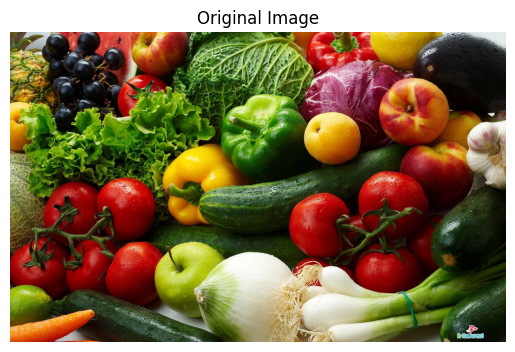

In [8]:
image_path=r"C:\Users\psaia\OneDrive\Desktop\lav\vegetables.jpg"
x=cv2.imread(image_path)
xrgb=cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(xrgb)
plt.title("Original Image")
plt.axis('off')
plt.show()


In [9]:
x.shape

(1600, 2560, 3)

In [10]:
key="123"
text="secret"

In [11]:
key

'123'

In [12]:
text_ascii=[d[ch] for ch in text] #list of ascii values of text characters
key_ascii=[d[ch] for ch in key]   #list of ascii values of key characters
print(text_ascii)
print(key_ascii)

[115, 101, 99, 114, 101, 116]
[49, 50, 51]


In [13]:
x_enc=x.copy()
n=0  #number of rows
m=0  #number of columns
z=0  #colour panel
l=len(text)
kl=0
for i in range(l):
    orig_val=x_enc[n,m,z]
    new_val=d[text[i]]^d[key[kl]]
    x_enc[n,m,z]=new_val
    print(f"Embedding '{text[i]}' (ASCII {d[text[i]]}) XOR '{key[kl]}' ASCII {d[key[kl]]}) = {new_val} at pixel ({n},{m},{z}) [original={orig_val}]")
    n=n+1
    m=m+1
    z=(z+1)%3
    m=(m+1)%3
    kl=(kl+1)%len(key)

Embedding 's' (ASCII 115) XOR '1' ASCII 49) = 66 at pixel (0,0,0) [original=30]
Embedding 'e' (ASCII 101) XOR '2' ASCII 50) = 87 at pixel (1,2,1) [original=107]
Embedding 'c' (ASCII 99) XOR '3' ASCII 51) = 80 at pixel (2,1,2) [original=104]
Embedding 'r' (ASCII 114) XOR '1' ASCII 49) = 67 at pixel (3,0,0) [original=34]
Embedding 'e' (ASCII 101) XOR '2' ASCII 50) = 87 at pixel (4,2,1) [original=101]
Embedding 't' (ASCII 116) XOR '3' ASCII 51) = 71 at pixel (5,1,2) [original=102]


In [14]:
cv2.imwrite("encrypt.jpg",x_enc)

True

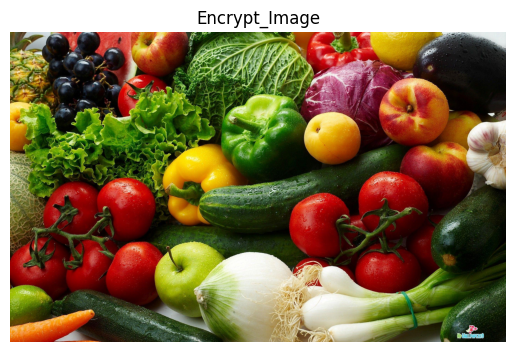

In [15]:
plt.imshow(cv2.cvtColor(x_enc,cv2.COLOR_BGR2RGB))
plt.title("Encrypt_Image")
plt.axis('off')
plt.show()

In [16]:
n,m,z=0,0,0
kl=0
decrypt=""
for i in range(len(text)):
    val=x_enc[n,m,z]
    orig_char=c[val^d[key[kl]]]
    decrypt=decrypt+orig_char

    print(f"Decrypting pixel ({n},{m},{z}): {val} XOR {d[key[kl]]} = {val ^ d[key[kl]]} -> '{orig_char}'")
    
    n=n+1
    m=m+1
    m=(m+1)%3
    z=(z+1)%3
    kl=(kl+1)%len(key)
print(decrypt)

Decrypting pixel (0,0,0): 66 XOR 49 = 115 -> 's'
Decrypting pixel (1,2,1): 87 XOR 50 = 101 -> 'e'
Decrypting pixel (2,1,2): 80 XOR 51 = 99 -> 'c'
Decrypting pixel (3,0,0): 67 XOR 49 = 114 -> 'r'
Decrypting pixel (4,2,1): 87 XOR 50 = 101 -> 'e'
Decrypting pixel (5,1,2): 71 XOR 51 = 116 -> 't'
secret
